**- uni variate analysis for legality (pie chart) and sub regions of asia (bar chart), performed on Rstudio**  
**- correlation between use of contraception and categories: rural, urban, in union, formerly in union, never in union, poorest, richest**  
**- correlation between the legality in each region and categories: rural, urban, in union, formerly in union, never in union, poorest, richest**  
**- and how the legality in each country/subregion correlates to the % of pregnancies ending in abortion**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,15)})

In [2]:
countries = pd.read_csv("all countries.csv",encoding='cp1252',header=0, index_col=0)
countries.head()

,Region,"Among rural women aged 15–49 who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among rural women aged 15–49 who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among urban women aged 15–49 who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among urban women aged 15–49 who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among women aged 15–49 formerly in union who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among women aged 15–49 formerly in union who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among women aged 15–49 in the poorest wealth quintile who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among women aged 15–49 in the poorest wealth quintile who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among women aged 15–49 in the richest wealth quintile who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among women aged 15–49 in the richest wealth quintile who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among women aged 15–49 in union who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among women aged 15–49 in union who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Among women aged 15–49 never in union who want to avoid pregnancy, % not using any method of contraception, 2019 [1]","Among women aged 15–49 never in union who want to avoid pregnancy, % using a traditional method of contraception, 2019 [2, 1]","Average annual % of all pregnancies ending in abortion, 2015-2019","Average annual % of unintended pregnancies ending in abortion, 2015-2019"
Country,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,55,4,39,9,55,1,61,2,35,9,51,5,17,11,0,0
Albania,Central and Eastern Europe,28,65,27,63,61,26,32,60,20,70,27,65,24,55,13,59
Algeria,North Africa,15,9,14,11,100,0,16,7,13,11,13,10,46,8,0,0
Angola,Southern Africa,92,2,56,3,50,1,94,1,39,3,70,3,52,2,13,28
Argentina,South America,20,6,12,4,15,2,19,6,8,2,13,5,11,1,28,48


In [3]:
countries.columns = ['Region',
               '% rural, no contraception', 
               '% rural, with contraception', 
               '% urban, no contraception',
               '% urban, with contraception',
               '% formerly in union, no contraception',
               '% formerly in union, with contraception',
               '% poorest wealth quintile, no contraception',
               '% poorest wealth quintile, with contraception',
               '% richest wealth quintile, no contraception',
               '% richest wealth quintile, with contraception',
               '% in union, no contraception',
               '% in union, with contraception',
               '% never in union, no contraception',
               '% never in union, with contraception',
               '% avg pregnancies ending in abortion',
               '% avg unintended pregnancies ending in abortion']
countries.head()

,Region,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion
Country,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,55,4,39,9,55,1,61,2,35,9,51,5,17,11,0,0
Albania,Central and Eastern Europe,28,65,27,63,61,26,32,60,20,70,27,65,24,55,13,59
Algeria,North Africa,15,9,14,11,100,0,16,7,13,11,13,10,46,8,0,0
Angola,Southern Africa,92,2,56,3,50,1,94,1,39,3,70,3,52,2,13,28
Argentina,South America,20,6,12,4,15,2,19,6,8,2,13,5,11,1,28,48


In [4]:
countries.isna().sum()

Region                                             0
% rural, no contraception                          0
% rural, with contraception                        0
% urban, no contraception                          0
% urban, with contraception                        0
% formerly in union, no contraception              0
% formerly in union, with contraception            0
% poorest wealth quintile, no contraception        0
% poorest wealth quintile, with contraception      0
% richest wealth quintile, no contraception        0
% richest wealth quintile, with contraception      0
% in union, no contraception                       0
% in union, with contraception                     0
% never in union, no contraception                 0
% never in union, with contraception               0
% avg pregnancies ending in abortion               0
% avg unintended pregnancies ending in abortion    0
dtype: int64

In [5]:
legality = pd.read_csv("legality.csv")
legality.head()

,country,legality
0,Afghanistan,To save a woman's life
1,Albania,No restriction
2,Algeria,To preserve physical/mental health
3,Angola,Prohibited altogether
4,Argentina,To preserve physical health


In [6]:
legality.columns = ['Country','Legality']
legality.head()

,Country,Legality
0,Afghanistan,To save a woman's life
1,Albania,No restriction
2,Algeria,To preserve physical/mental health
3,Angola,Prohibited altogether
4,Argentina,To preserve physical health


In [7]:
df = pd.merge(countries, legality, on='Country', how='right')
df.head()

,Country,Region,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion,Legality
0,Afghanistan,South Asia,55.0,4.0,39.0,9.0,55.0,1.0,61.0,2.0,35.0,9.0,51.0,5.0,17.0,11.0,0.0,0.0,To save a woman's life
1,Albania,Central and Eastern Europe,28.0,65.0,27.0,63.0,61.0,26.0,32.0,60.0,20.0,70.0,27.0,65.0,24.0,55.0,13.0,59.0,No restriction
2,Algeria,North Africa,15.0,9.0,14.0,11.0,100.0,0.0,16.0,7.0,13.0,11.0,13.0,10.0,46.0,8.0,0.0,0.0,To preserve physical/mental health
3,Angola,Southern Africa,92.0,2.0,56.0,3.0,50.0,1.0,94.0,1.0,39.0,3.0,70.0,3.0,52.0,2.0,13.0,28.0,Prohibited altogether
4,Argentina,South America,20.0,6.0,12.0,4.0,15.0,2.0,19.0,6.0,8.0,2.0,13.0,5.0,11.0,1.0,28.0,48.0,To preserve physical health


In [8]:
round(df.describe(),2)

,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion
count,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,25.62,7.99,19.97,8.34,19.38,4.07,28.99,7.46,18.11,8.85,23.32,8.34,25.26,6.50,17.49,38.56
std,22.92,11.16,17.03,10.38,20.23,5.78,25.13,11.17,15.88,10.68,21.08,11.18,19.71,7.39,10.89,21.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,1.00,8.00,1.00,0.00,0.00,11.00,0.00,5.00,1.00,7.00,1.00,7.00,0.00,11.00,28.00
50%,20.00,4.00,16.00,5.00,14.00,2.00,24.00,3.00,15.00,6.00,18.00,4.00,26.00,5.00,17.00,38.00
75%,41.00,10.00,33.00,12.00,30.00,6.00,48.00,9.00,29.00,13.00,40.00,11.00,38.00,10.00,24.00,51.00
max,92.00,65.00,72.00,63.00,100.00,39.00,94.00,60.00,66.00,70.00,81.00,65.00,87.00,55.00,49.00,83.00


In [9]:
df["Legality"] = df["Legality"].astype('category')
df["Legality"].cat.categories

Index(['No restriction', 'Prohibited altogether',
       'To preserve health/on socioeconomic grounds',
       'To preserve physical health', 'To preserve physical/mental health',
       'To save a woman's life', 'Varies by state'],
      dtype='object')

In [10]:
df["Region"] = df["Region"].astype('category')
df["Region"].cat.categories

Index(['Australia and New Zealand', 'Carribean', 'Central Africa',
       'Central America', 'Central Asia', 'Central and Eastern Europe',
       'East Africa', 'East Asia', 'Middle East', 'Nordic countries',
       'North Africa', 'North America', 'Pacific Islands', 'South America',
       'South Asia', 'South East Asia', 'Southern Africa', 'Southern Europe',
       'West Africa', 'West Asia', 'Western Europe'],
      dtype='object')

In [11]:
df.dtypes

Country                                              object
Region                                             category
% rural, no contraception                           float64
% rural, with contraception                         float64
% urban, no contraception                           float64
% urban, with contraception                         float64
% formerly in union, no contraception               float64
% formerly in union, with contraception             float64
% poorest wealth quintile, no contraception         float64
% poorest wealth quintile, with contraception       float64
% richest wealth quintile, no contraception         float64
% richest wealth quintile, with contraception       float64
% in union, no contraception                        float64
% in union, with contraception                      float64
% never in union, no contraception                  float64
% never in union, with contraception                float64
% avg pregnancies ending in abortion    

In [12]:
df2 = df[df['Region'].str.contains('Asia', na=True)]
df2 = df2.set_index('Country')
print(df.shape)
print(df2.shape)
df2.head()

(163, 19)
(35, 18)


,Region,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion,Legality
Country,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,55.0,4.0,39.0,9.0,55.0,1.0,61.0,2.0,35.0,9.0,51.0,5.0,17.0,11.0,0.0,0.0,To save a woman's life
Bangladesh,South Asia,16.0,10.0,12.0,12.0,10.0,2.0,16.0,9.0,14.0,13.0,15.0,11.0,71.0,13.0,30.0,60.0,To save a woman's life
Bhutan,South Asia,19.0,2.0,17.0,5.0,11.0,0.0,17.0,2.0,19.0,4.0,19.0,3.0,36.0,23.0,29.0,68.0,To save a woman's life
Cambodia,South East Asia,16.0,21.0,14.0,34.0,24.0,6.0,21.0,17.0,13.0,34.0,16.0,23.0,23.0,25.0,30.0,65.0,No restriction
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,To preserve health/on socioeconomic grounds


In [13]:
df2.isnull().sum()

Region                                             6
% rural, no contraception                          6
% rural, with contraception                        6
% urban, no contraception                          6
% urban, with contraception                        6
% formerly in union, no contraception              6
% formerly in union, with contraception            6
% poorest wealth quintile, no contraception        6
% poorest wealth quintile, with contraception      6
% richest wealth quintile, no contraception        6
% richest wealth quintile, with contraception      6
% in union, no contraception                       6
% in union, with contraception                     6
% never in union, no contraception                 6
% never in union, with contraception               6
% avg pregnancies ending in abortion               6
% avg unintended pregnancies ending in abortion    6
Legality                                           0
dtype: int64

In [14]:
df2[['% rural, no contraception', '% rural, with contraception', 
     '% urban, no contraception', '% urban, with contraception',
     '% formerly in union, no contraception',
     '% formerly in union, with contraception',
     '% poorest wealth quintile, no contraception',
     '% poorest wealth quintile, with contraception',
     '% richest wealth quintile, no contraception',
     '% richest wealth quintile, with contraception',
     '% in union, no contraception', '% in union, with contraception',
     '% never in union, no contraception', '% never in union, with contraception',
     '% avg pregnancies ending in abortion',
     '% avg unintended pregnancies ending in abortion']] = df2[[
    '% rural, no contraception', '% rural, with contraception', 
    '% urban, no contraception', '% urban, with contraception',
    '% formerly in union, no contraception',
    '% formerly in union, with contraception',
    '% poorest wealth quintile, no contraception',
    '% poorest wealth quintile, with contraception',
    '% richest wealth quintile, no contraception',
    '% richest wealth quintile, with contraception',
    '% in union, no contraception', '% in union, with contraception',
    '% never in union, no contraception', '% never in union, with contraception',
    '% avg pregnancies ending in abortion',
    '% avg unintended pregnancies ending in abortion']].fillna(0)
df2.head()

,Region,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion,Legality
Country,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,55.0,4.0,39.0,9.0,55.0,1.0,61.0,2.0,35.0,9.0,51.0,5.0,17.0,11.0,0.0,0.0,To save a woman's life
Bangladesh,South Asia,16.0,10.0,12.0,12.0,10.0,2.0,16.0,9.0,14.0,13.0,15.0,11.0,71.0,13.0,30.0,60.0,To save a woman's life
Bhutan,South Asia,19.0,2.0,17.0,5.0,11.0,0.0,17.0,2.0,19.0,4.0,19.0,3.0,36.0,23.0,29.0,68.0,To save a woman's life
Cambodia,South East Asia,16.0,21.0,14.0,34.0,24.0,6.0,21.0,17.0,13.0,34.0,16.0,23.0,23.0,25.0,30.0,65.0,No restriction
China,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,To preserve health/on socioeconomic grounds


In [15]:
df2.isnull().sum()

Region                                             6
% rural, no contraception                          0
% rural, with contraception                        0
% urban, no contraception                          0
% urban, with contraception                        0
% formerly in union, no contraception              0
% formerly in union, with contraception            0
% poorest wealth quintile, no contraception        0
% poorest wealth quintile, with contraception      0
% richest wealth quintile, no contraception        0
% richest wealth quintile, with contraception      0
% in union, no contraception                       0
% in union, with contraception                     0
% never in union, no contraception                 0
% never in union, with contraception               0
% avg pregnancies ending in abortion               0
% avg unintended pregnancies ending in abortion    0
Legality                                           0
dtype: int64

In [16]:
df2.filter(['Country','Region','Legality'])

,Region,Legality
Country,,
Afghanistan,South Asia,To save a woman's life
Bangladesh,South Asia,To save a woman's life
Bhutan,South Asia,To save a woman's life
Cambodia,South East Asia,No restriction
China,NaN,To preserve health/on socioeconomic grounds
India,South Asia,To preserve health/on socioeconomic grounds
Indonesia,South East Asia,To save a woman's life
Iran,South Asia,To save a woman's life
Iraq,West Asia,Prohibited altogether


In [17]:
round(df2.describe(),2)

,"% rural, no contraception","% rural, with contraception","% urban, no contraception","% urban, with contraception","% formerly in union, no contraception","% formerly in union, with contraception","% poorest wealth quintile, no contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, no contraception","% richest wealth quintile, with contraception","% in union, no contraception","% in union, with contraception","% never in union, no contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,18.51,7.34,16.54,10.26,15.74,2.37,21.66,6.06,15.69,11.34,17.71,8.66,27.97,9.34,15.29,40.94
std,16.71,7.73,14.15,9.71,20.83,3.02,19.49,6.73,13.54,10.61,15.70,8.50,23.73,8.47,13.29,33.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.50,0.50,2.50,2.00,0.00,0.00,3.00,0.50,2.50,2.00,2.50,1.00,3.50,1.00,0.00,0.00
50%,18.00,5.00,16.00,8.00,10.00,1.00,20.00,3.00,15.00,9.00,18.00,5.00,28.00,9.00,16.00,61.00
75%,22.50,11.50,23.00,20.00,23.00,4.00,28.50,8.50,22.00,22.50,22.00,16.50,38.00,13.00,27.50,68.50
max,61.00,26.00,59.00,34.00,100.00,12.00,69.00,20.00,58.00,34.00,60.00,25.00,87.00,29.00,34.00,83.00


In [18]:
df2["Region"] = df2[df2["Region"].isin(['Central Asia','East Asia','South Asia','South East Asia','West Asia'])].astype('category')

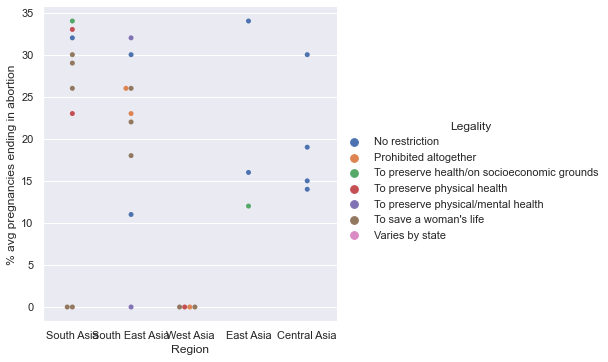

In [19]:
sns.catplot(data=df2, x='Region', y="% avg pregnancies ending in abortion", hue="Legality", kind="swarm");

C:\Users\se\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\se\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


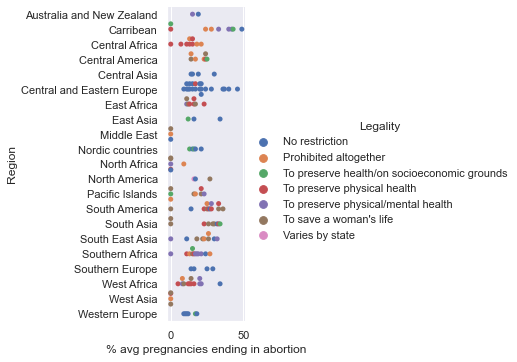

In [20]:
sns.catplot(data=df, y='Region', x="% avg pregnancies ending in abortion",
            hue="Legality", kind="swarm");

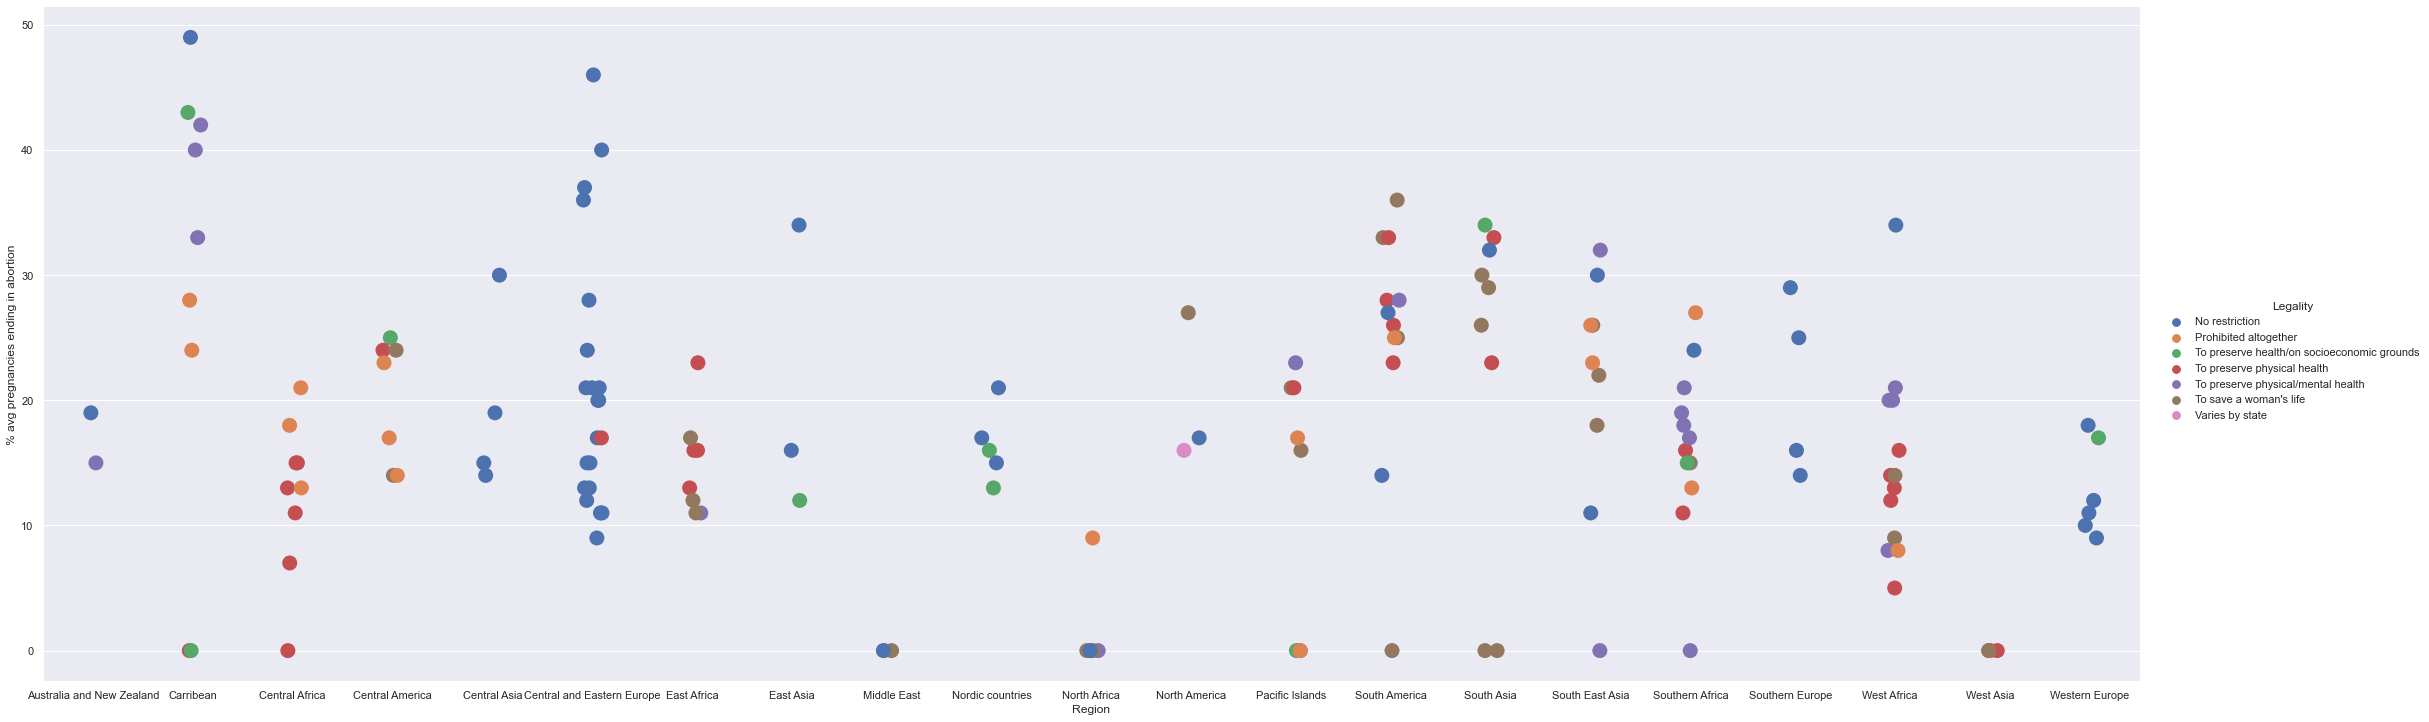

In [21]:
sns.catplot(data=df, x="Region", y="% avg pregnancies ending in abortion", 
            hue="Legality", kind="strip",jitter=True,
            height=10, aspect=3, s= 15);

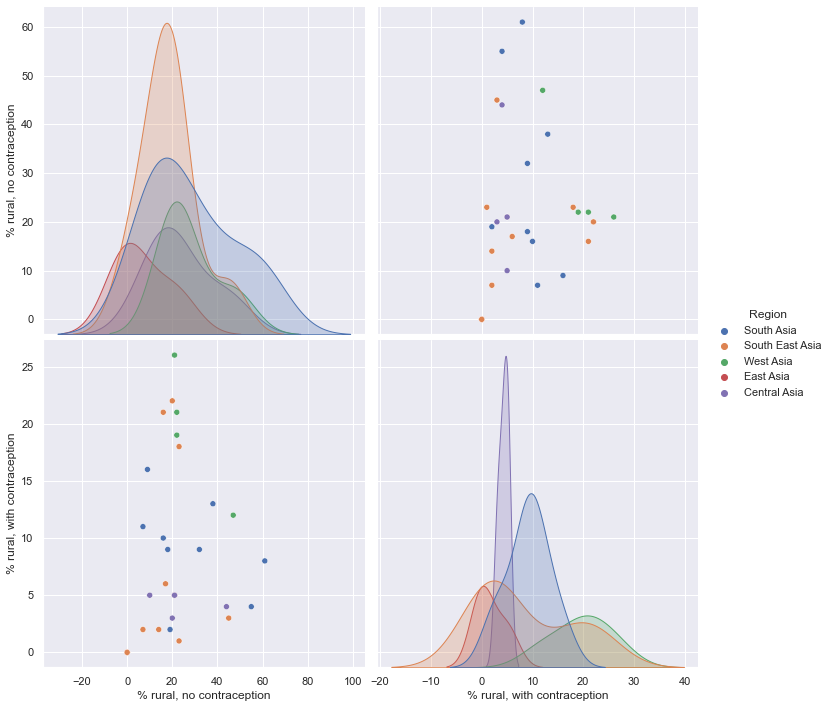

In [22]:
rural = sns.pairplot(df2[['% rural, no contraception',
                          '% rural, with contraception',
                          'Region']],hue='Region',height=5)

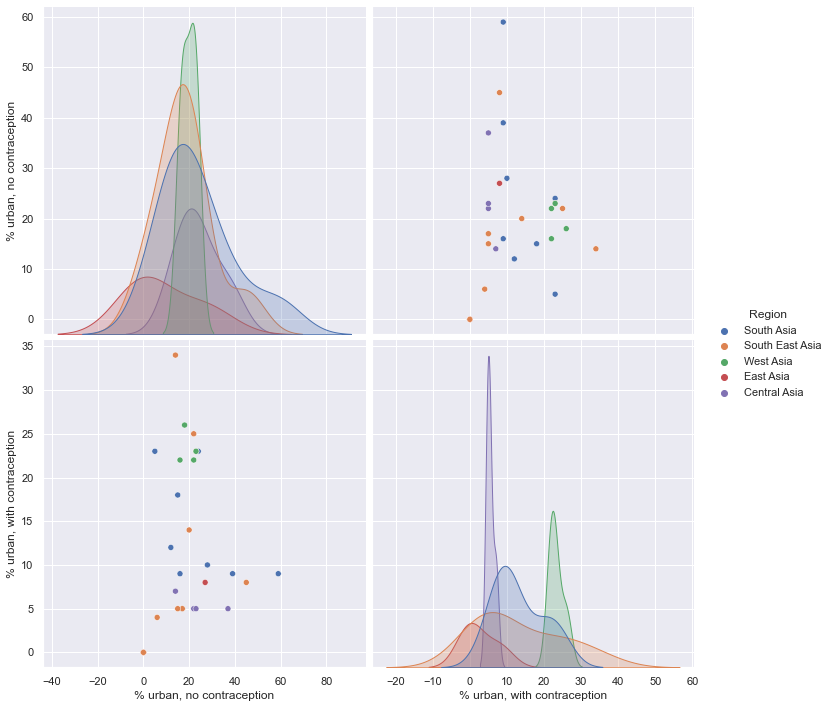

In [23]:
urban = sns.pairplot(df2[['% urban, no contraception',
                          '% urban, with contraception',
                          'Region']],hue='Region',height=5)

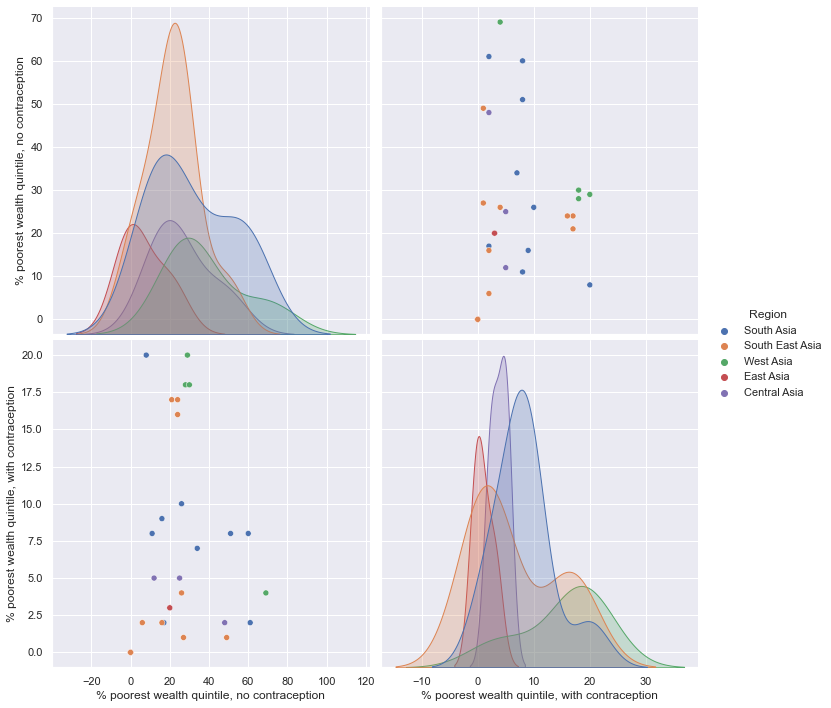

In [24]:
poorest_wealth_quintile = sns.pairplot(df2[['% poorest wealth quintile, no contraception',
                                            '% poorest wealth quintile, with contraception',
                                            'Region']],hue='Region',height=5)

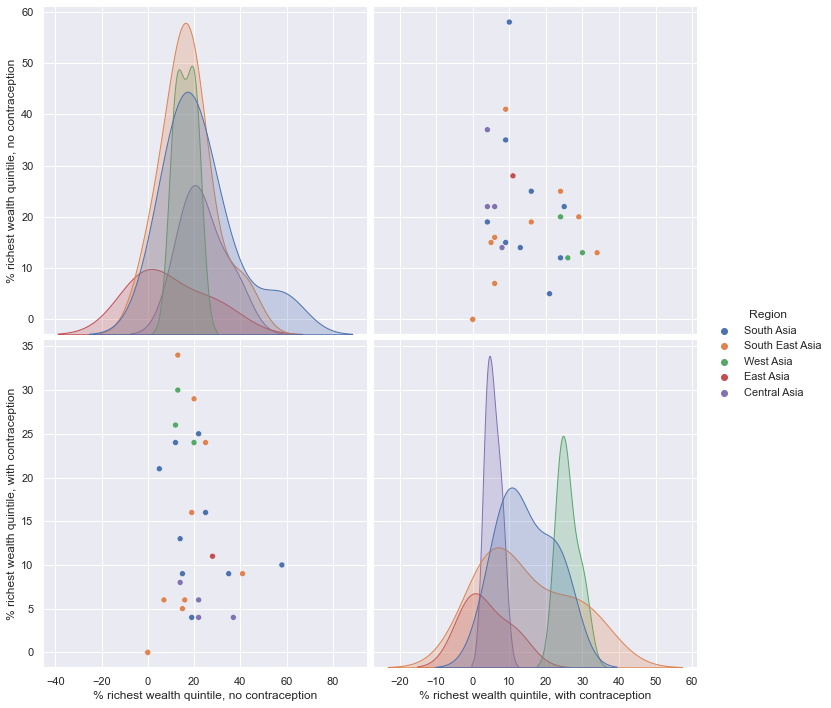

In [25]:
richest_wealth_quintile = sns.pairplot(df2[['% richest wealth quintile, no contraception',
                                            '% richest wealth quintile, with contraception',
                                            'Region']],hue='Region',height=5)

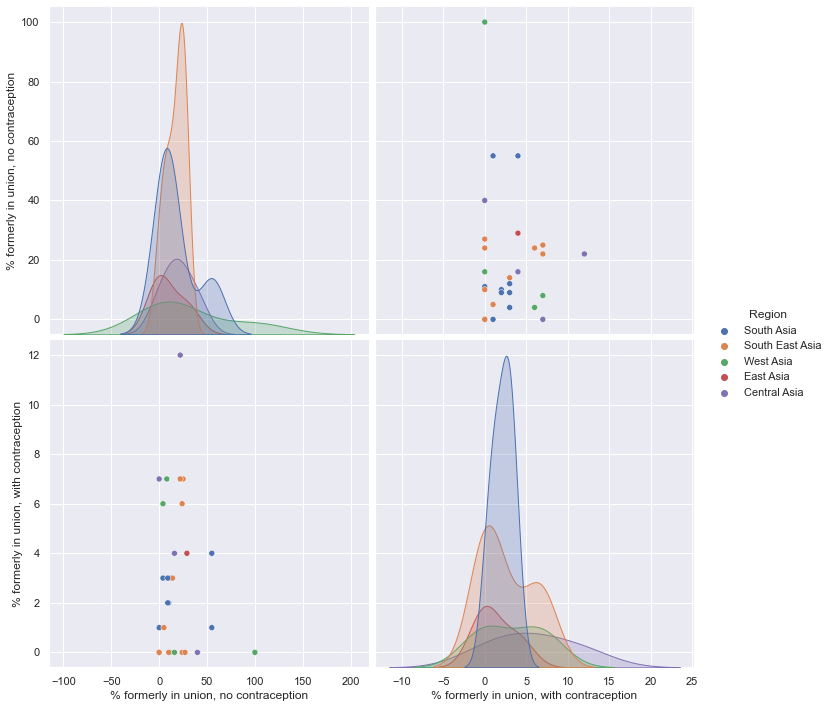

In [26]:
formerly_in_union = sns.pairplot(df2[['% formerly in union, no contraception',
                                      '% formerly in union, with contraception',
                                      'Region']],hue='Region',height=5)

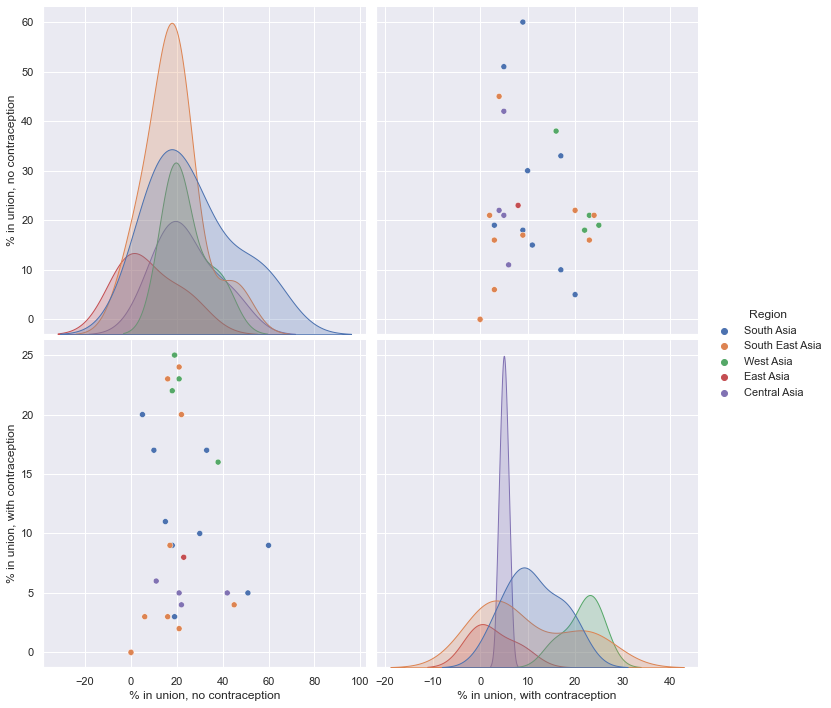

In [27]:
in_union = sns.pairplot(df2[['% in union, no contraception',
                             '% in union, with contraception',
                             'Region']],hue='Region',height=5)

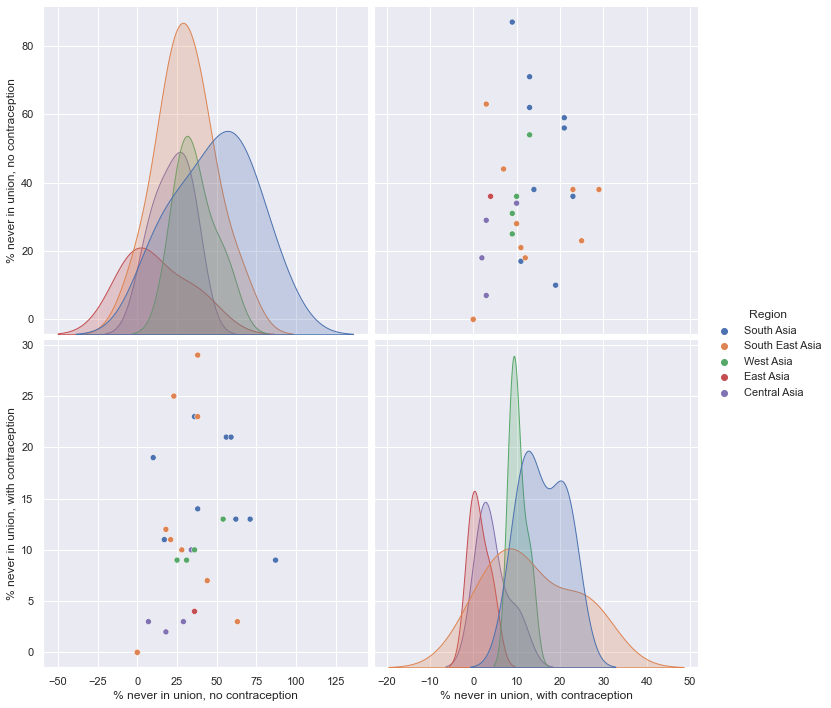

In [28]:
never_in_union = sns.pairplot(df2[['% never in union, no contraception',
                                   '% never in union, with contraception',
                                   'Region']],hue='Region',height=5)

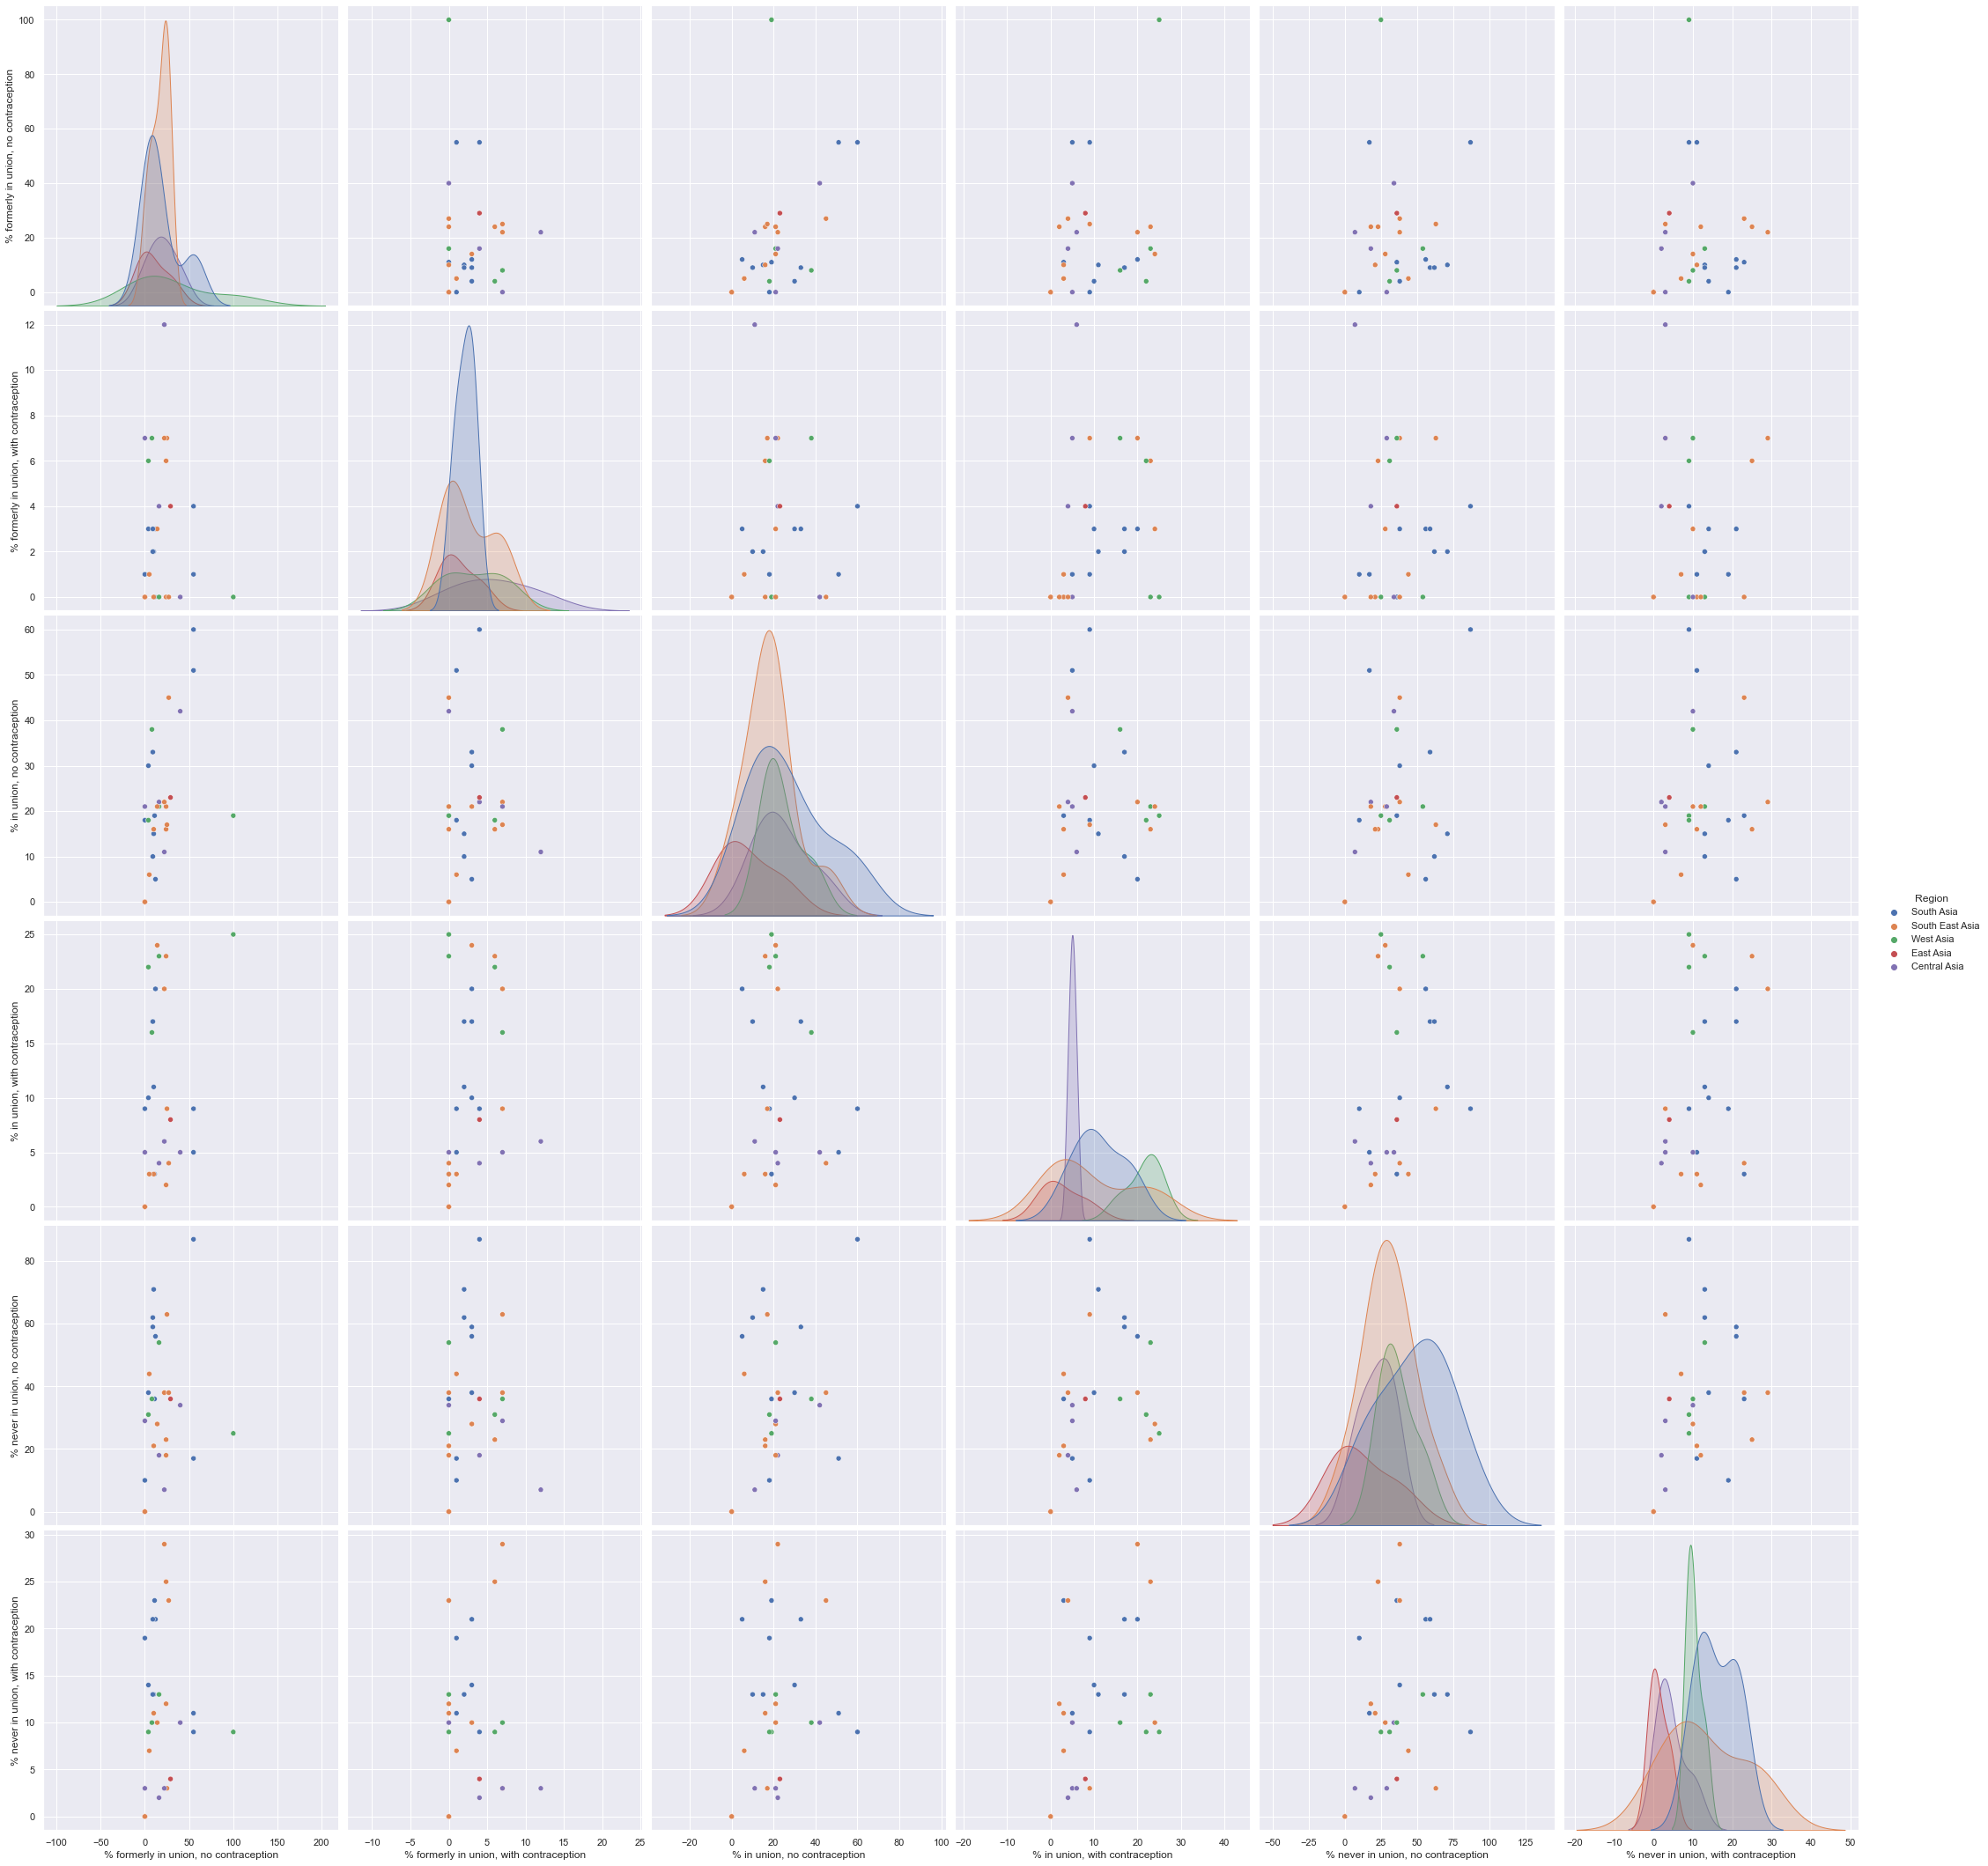

In [29]:
union = sns.pairplot(df2[['% formerly in union, no contraception',
                          '% formerly in union, with contraception',
                          '% in union, no contraception',
                          '% in union, with contraception',
                          '% never in union, no contraception',
                          '% never in union, with contraception',
                          'Region']],hue='Region',height=5)

C:\Users\se\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\se\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


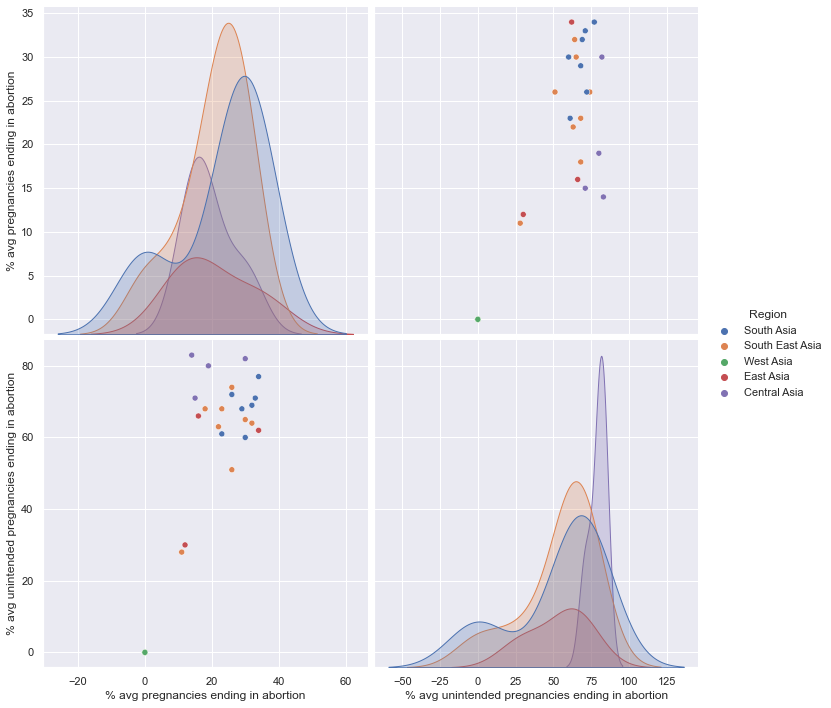

In [30]:
pregnancies_ending_in_abortion =  sns.pairplot(df2[['% avg pregnancies ending in abortion',
                                                    '% avg unintended pregnancies ending in abortion',
                                                    'Region']],hue='Region',height=5)

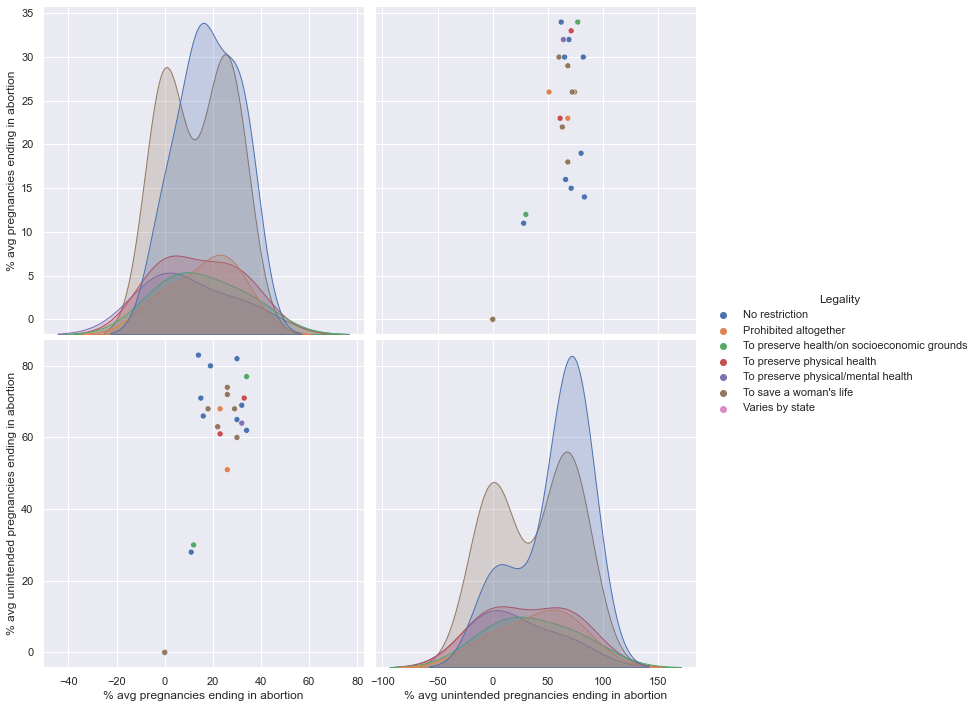

In [31]:
pregnancies_ending_in_abortion =  sns.pairplot(df2[['% avg pregnancies ending in abortion',
                                                    '% avg unintended pregnancies ending in abortion',
                                                    'Legality']],hue='Legality',height=5)

In [32]:
with_contraception = df2[['% rural, with contraception', 
     '% urban, with contraception',
     '% formerly in union, with contraception',
     '% poorest wealth quintile, with contraception',
     '% richest wealth quintile, with contraception',
     '% in union, with contraception',
     '% never in union, with contraception',
     '% avg pregnancies ending in abortion',
     '% avg unintended pregnancies ending in abortion']].corr()
with_contraception

,"% rural, with contraception","% urban, with contraception","% formerly in union, with contraception","% poorest wealth quintile, with contraception","% richest wealth quintile, with contraception","% in union, with contraception","% never in union, with contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion
"% rural, with contraception",1.000000,0.925083,0.359861,0.926617,0.939982,0.972843,0.546352,-0.051088,-0.119679
"% urban, with contraception",0.925083,1.000000,0.437700,0.874209,0.986981,0.970405,0.650433,-0.012428,-0.074397
"% formerly in union, with contraception",0.359861,0.437700,1.000000,0.332955,0.436311,0.393521,0.145463,0.175271,0.299075
"% poorest wealth quintile, with contraception",0.926617,0.874209,0.332955,1.000000,0.862655,0.939229,0.562135,-0.062279,-0.146061
"% richest wealth quintile, with contraception",0.939982,0.986981,0.436311,0.862655,1.000000,0.975295,0.609409,0.000953,-0.057492
"% in union, with contraception",0.972843,0.970405,0.393521,0.939229,0.975295,1.000000,0.581368,-0.064705,-0.125554
"% never in union, with contraception",0.546352,0.650433,0.145463,0.562135,0.609409,0.581368,1.000000,0.367864,0.284773
% avg pregnancies ending in abortion,-0.051088,-0.012428,0.175271,-0.062279,0.000953,-0.064705,0.367864,1.000000,0.902648
% avg unintended pregnancies ending in abortion,-0.119679,-0.074397,0.299075,-0.146061,-0.057492,-0.125554,0.284773,0.902648,1.000000


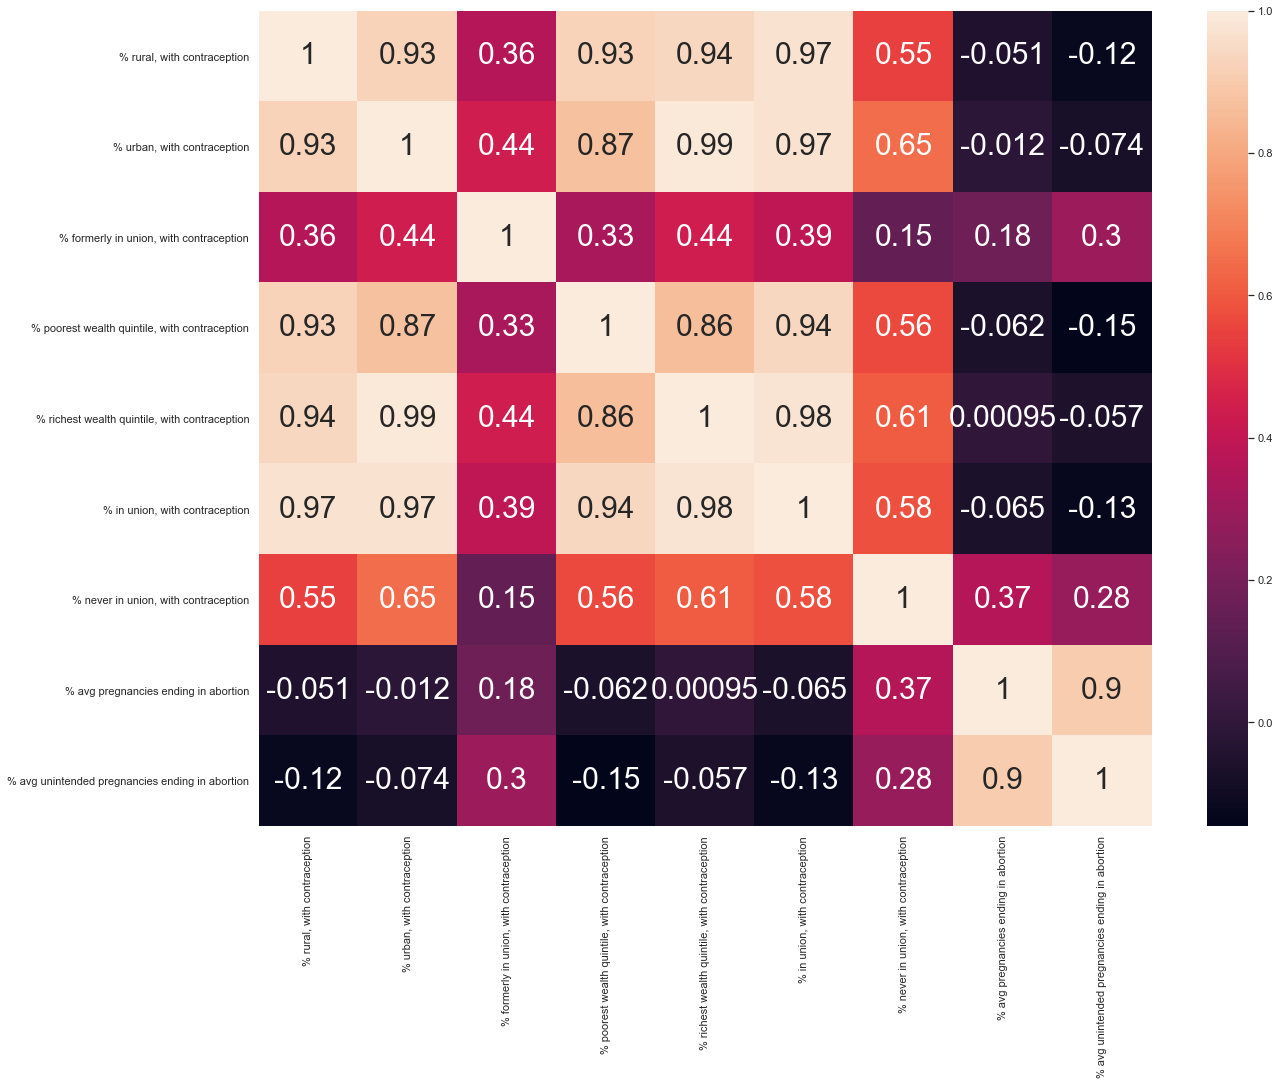

In [33]:
wc = sns.heatmap(with_contraception, annot = True, annot_kws={'size':30})

In [34]:
no_contraception = df2[['% rural, no contraception', 
     '% urban, no contraception',
     '% formerly in union, no contraception',
     '% poorest wealth quintile, no contraception',
     '% richest wealth quintile, no contraception',
     '% in union, no contraception',
     '% never in union, no contraception',
     '% avg pregnancies ending in abortion',
     '% avg unintended pregnancies ending in abortion']].corr()
no_contraception

,"% rural, no contraception","% urban, no contraception","% formerly in union, no contraception","% poorest wealth quintile, no contraception","% richest wealth quintile, no contraception","% in union, no contraception","% never in union, no contraception",% avg pregnancies ending in abortion,% avg unintended pregnancies ending in abortion
"% rural, no contraception",1.000000,0.937468,0.560130,0.976541,0.918848,0.993014,0.554095,0.181600,0.248473
"% urban, no contraception",0.937468,1.000000,0.584191,0.872083,0.992809,0.968264,0.607897,0.283101,0.392703
"% formerly in union, no contraception",0.560130,0.584191,1.000000,0.511368,0.557607,0.568500,0.308937,-0.010669,0.039180
"% poorest wealth quintile, no contraception",0.976541,0.872083,0.511368,1.000000,0.840609,0.953257,0.530730,0.112982,0.182125
"% richest wealth quintile, no contraception",0.918848,0.992809,0.557607,0.840609,1.000000,0.954990,0.618493,0.333176,0.440751
"% in union, no contraception",0.993014,0.968264,0.568500,0.953257,0.954990,1.000000,0.559277,0.225322,0.305674
"% never in union, no contraception",0.554095,0.607897,0.308937,0.530730,0.618493,0.559277,1.000000,0.365347,0.340029
% avg pregnancies ending in abortion,0.181600,0.283101,-0.010669,0.112982,0.333176,0.225322,0.365347,1.000000,0.902648
% avg unintended pregnancies ending in abortion,0.248473,0.392703,0.039180,0.182125,0.440751,0.305674,0.340029,0.902648,1.000000


In [35]:
nc = df2[['% rural, no contraception',
     '% formerly in union, no contraception',
     '% poorest wealth quintile, no contraception',
     '% avg unintended pregnancies ending in abortion']].corr()

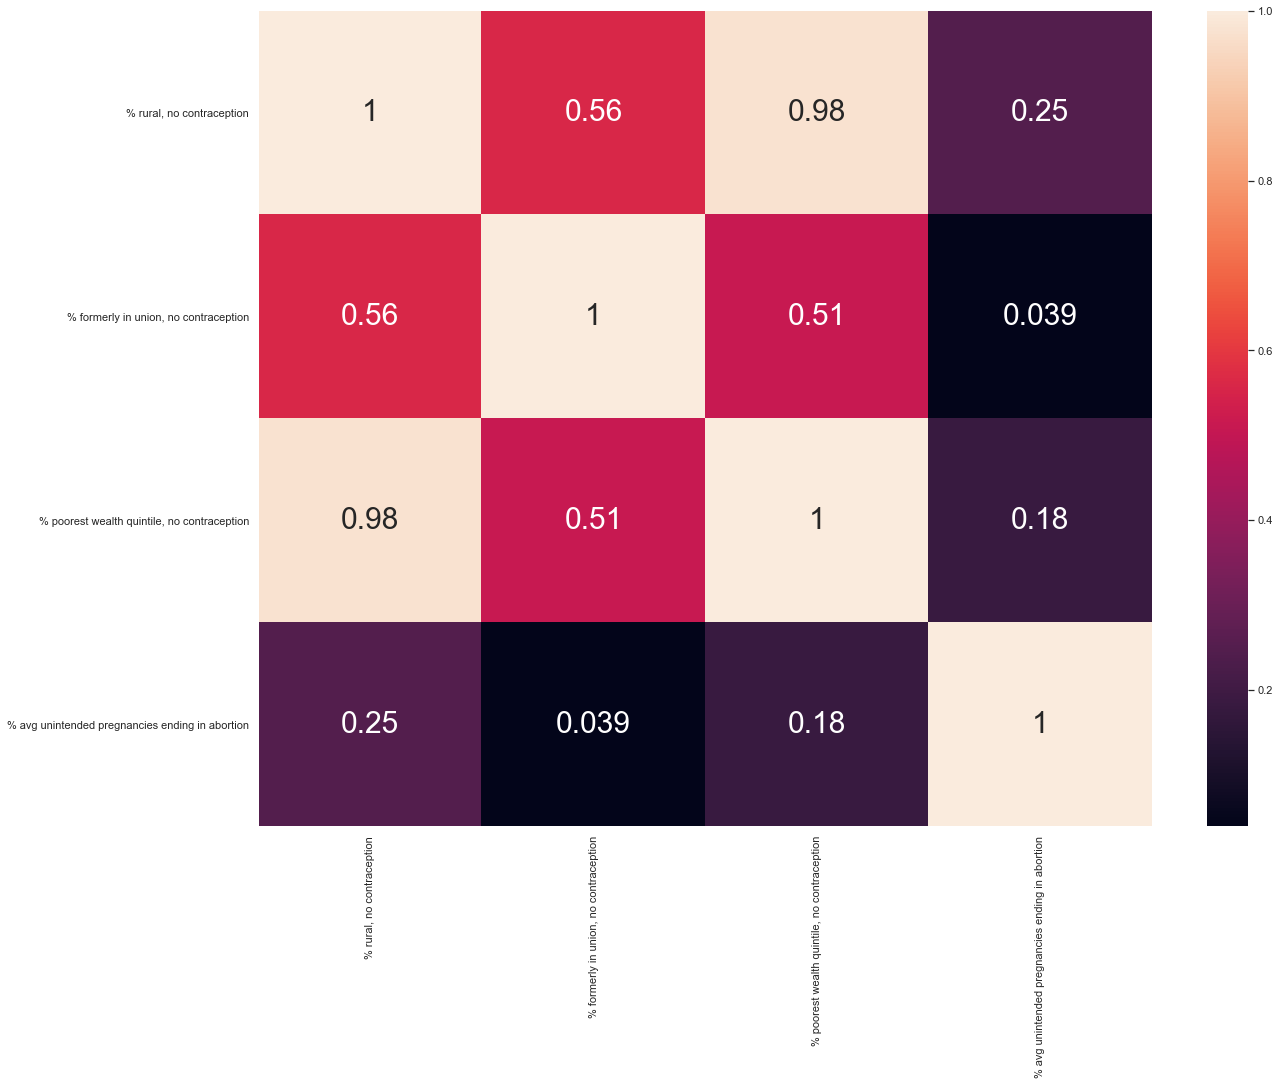

In [36]:
nocontraception = sns.heatmap(nc, annot = True, annot_kws={'size':30})

In [37]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})

In [38]:
df3 = df2[['% rural, no contraception', 
           '% formerly in union, no contraception',
           '% poorest wealth quintile, no contraception',
           '% avg unintended pregnancies ending in abortion',
           'Region','Legality']]
df3.head()

,"% rural, no contraception","% formerly in union, no contraception","% poorest wealth quintile, no contraception",% avg unintended pregnancies ending in abortion,Region,Legality
Country,,,,,,
Afghanistan,55.0,55.0,61.0,0.0,South Asia,To save a woman's life
Bangladesh,16.0,10.0,16.0,60.0,South Asia,To save a woman's life
Bhutan,19.0,11.0,17.0,68.0,South Asia,To save a woman's life
Cambodia,16.0,24.0,21.0,65.0,South East Asia,No restriction
China,0.0,0.0,0.0,0.0,NaN,To preserve health/on socioeconomic grounds


In [39]:
newdf = pd.get_dummies(df3,columns=['Region','Legality'])
newdf.head()

,"% rural, no contraception","% formerly in union, no contraception","% poorest wealth quintile, no contraception",% avg unintended pregnancies ending in abortion,Region_Central Asia,Region_East Asia,Region_South Asia,Region_South East Asia,Region_West Asia,Legality_No restriction,Legality_Prohibited altogether,Legality_To preserve health/on socioeconomic grounds,Legality_To preserve physical health,Legality_To preserve physical/mental health,Legality_To save a woman's life,Legality_Varies by state
Country,,,,,,,,,,,,,,,,
Afghanistan,55.0,55.0,61.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
Bangladesh,16.0,10.0,16.0,60.0,0,0,1,0,0,0,0,0,0,0,1,0
Bhutan,19.0,11.0,17.0,68.0,0,0,1,0,0,0,0,0,0,0,1,0
Cambodia,16.0,24.0,21.0,65.0,0,0,0,1,0,1,0,0,0,0,0,0
China,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
X = newdf.drop('% avg unintended pregnancies ending in abortion', axis = 1).values
y = newdf['% avg unintended pregnancies ending in abortion']

print(X.shape)
print(y.shape)

X

(35, 15)
(35,)


array([[ 55.,  55.,  61.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 16.,  10.,  16.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 19.,  11.,  17.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 16.,  24.,  21.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.],
       [ 18.,   0.,  26.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.],
       [ 14.,  10.,  16.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [  7.,  12.,   8.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 22., 100.,  28.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,

In [41]:
X = newdf.drop('% avg unintended pregnancies ending in abortion', axis = 1).values
X2 = newdf.drop('% avg unintended pregnancies ending in abortion', axis = 1)
y = newdf['% avg unintended pregnancies ending in abortion']

print(X.shape)
print(y.shape)

X

(35, 15)
(35,)


array([[ 55.,  55.,  61.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 16.,  10.,  16.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 19.,  11.,  17.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 16.,  24.,  21.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.],
       [ 18.,   0.,  26.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.],
       [ 14.,  10.,  16.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [  7.,  12.,   8.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.],
       [ 22., 100.,  28.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,

In [42]:
dt = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [43]:
for i, column in enumerate(newdf.drop('% avg unintended pregnancies ending in abortion', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for % rural, no contraception is: 0.141
The feature importance for % formerly in union, no contraception is: 0.367
The feature importance for % poorest wealth quintile, no contraception is: 0.016
The feature importance for Region_Central Asia is: 0.075
The feature importance for Region_East Asia is: 0.065
The feature importance for Region_South Asia is: 0.107
The feature importance for Region_South East Asia is: 0.090
The feature importance for Region_West Asia is: 0.000
The feature importance for Legality_No restriction is: 0.107
The feature importance for Legality_Prohibited altogether is: 0.000
The feature importance for Legality_To preserve health/on socioeconomic grounds is: 0.032
The feature importance for Legality_To preserve physical health is: 0.000
The feature importance for Legality_To preserve physical/mental health is: 0.000
The feature importance for Legality_To save a woman's life is: 0.000
The feature importance for Legality_Varies by state is: 0.

In [44]:
f_col = []
f = []

for i,column in enumerate(newdf.drop('% avg unintended pregnancies ending in abortion',axis=1)):
    print('the feature importance for {} is: {}'.format(column,dt.feature_importances_[i]))
    
    f_col.append(column)
    f.append(dt.feature_importances_[i])

the feature importance for % rural, no contraception is: 0.14109375427183113
the feature importance for % formerly in union, no contraception is: 0.3670221566238668
the feature importance for % poorest wealth quintile, no contraception is: 0.016043085084047032
the feature importance for Region_Central Asia is: 0.07527478077638253
the feature importance for Region_East Asia is: 0.06458920811703871
the feature importance for Region_South Asia is: 0.1073374797519108
the feature importance for Region_South East Asia is: 0.0895195710264728
the feature importance for Region_West Asia is: 0.0
the feature importance for Legality_No restriction is: 0.10703379418035602
the feature importance for Legality_Prohibited altogether is: 0.0
the feature importance for Legality_To preserve health/on socioeconomic grounds is: 0.032086170168094064
the feature importance for Legality_To preserve physical health is: 0.0
the feature importance for Legality_To preserve physical/mental health is: 0.0
the featur

In [53]:
f_col
f
f_df = zip(f_col,f)
f_df = pd.DataFrame(f_df,columns=['Feature','Feature Importance'])
f_df

f_df = f_df.sort_values('Feature Importance',ascending=False).reset_index()

columns_to_keep = f_df['Feature'][0:40]
f_df

,index,Feature,Feature Importance
0,1,"% formerly in union, no contraception",0.367022
1,0,"% rural, no contraception",0.141094
2,5,Region_South Asia,0.107337
3,8,Legality_No restriction,0.107034
4,6,Region_South East Asia,0.089520
5,3,Region_Central Asia,0.075275
6,4,Region_East Asia,0.064589
7,10,Legality_To preserve health/on socioeconomic g...,0.032086
8,2,"% poorest wealth quintile, no contraception",0.016043
9,7,Region_West Asia,0.000000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 15)
(7, 15)
(28,)
(7,)


In [47]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
y_pred

array([ 57.58490728,  43.90047784,  45.37905174,  -3.76252382,
        61.2189433 ,   7.60907168,  72.33004888,  76.21482201,
        68.12427931,  -8.97210515,   5.48731278,  83.10421816,
        -4.12427931,  60.55856591,  80.88804676,  57.71686977,
        63.16628107,  58.04343824,  47.06087945,  44.93912055,
        41.15168522,   1.70608716,  75.79291307,  34.23491052,
        70.01697426,  56.57356666,  16.23969199, -14.18325533])

In [48]:
print('The Accuracy on the training dataset is: ',
      lm.score(X_train, y_train) )
print('The Accuracy n2 on the training dataset is: ',
      r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', 
      lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ',
      sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE on the testing dataset is: ',
      sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ',
      mean_absolute_error(y_train,y_pred))
print('The MAE on the testing dataset is: ',
      mean_absolute_error(y_test,lm.predict(X_test)))

print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy on the training dataset is:  0.8012615976134841
The Accuracy n2 on the training dataset is:  0.8012615976134841

The Accuracy on the testing dataset is:  -0.17363296518260896

The RMSE on the training dataset is:  14.850377722650157
The RMSE on the testing dataset is:  34.73394283437151

The MAE on the training dataset is:  11.195450969976402
The MAE on the testing dataset is:  27.333420983686356

Coefficients:  [  0.79376451  -0.28266691  -0.62005272  74.32740981  39.45180777
  52.91986344  71.82585791  12.94762233   5.91545764  -0.65914417
   3.79369875   7.4336003   -5.81789334 -10.66571918   0.        ]

Intercept:  1.693614032951558


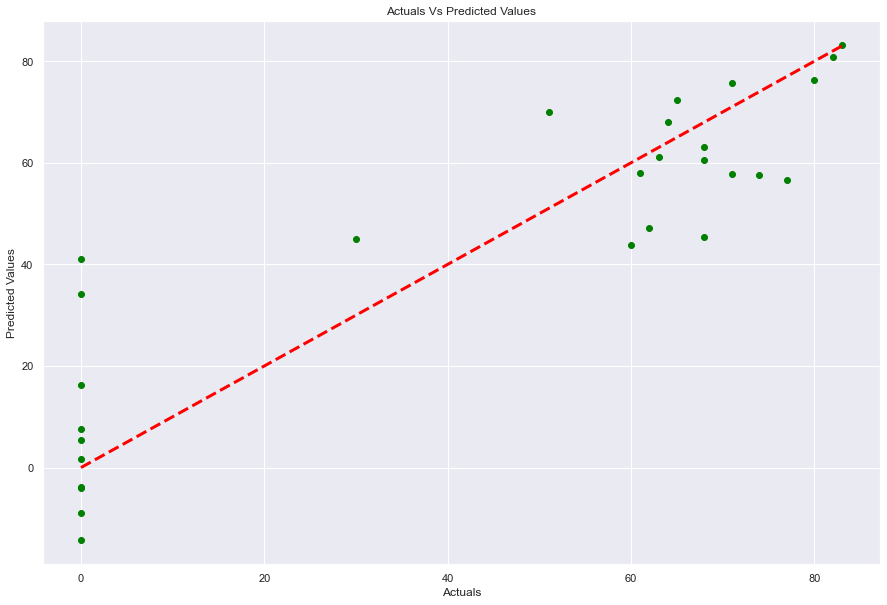

In [49]:
plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), 
                y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values');

C:\Users\se\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


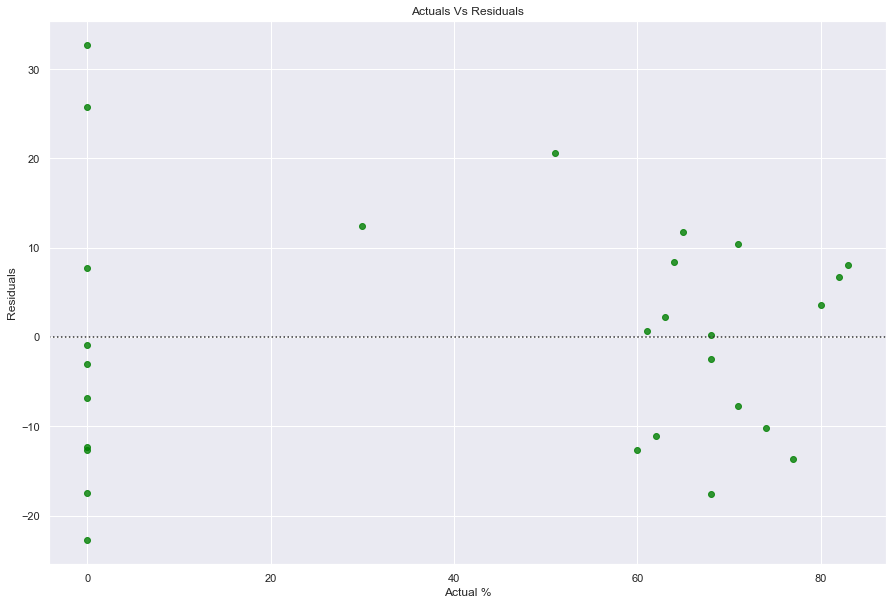

In [50]:
plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual %')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals');